In [81]:
import geopandas as gpd
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from datetime import datetime
import calendar
import folium
import geopandas as gpd
from pandas.plotting import register_matplotlib_converters
register_matplotlib_converters()

import math
import folium
import datetime
from os import listdir
from os.path import isfile, join

from matplotlib import gridspec
from matplotlib.backends.backend_pdf import PdfPages

import statsmodels.api as sm
from factor_analyzer import FactorAnalyzer

In [82]:
variaz = pd.read_csv('quake_data/variaz_phone.csv')
variaz = variaz[variaz['Cratere Centro Italia 2016'] == 1]
variaz

,Comune,Cratere Centro Italia 2016,Variaz,Variaz_init,Variaz_end
2,Accumoli,1,-50.161357,-10.301179,-62.678257
3,Acquacanina,1,-34.800125,-9.641580,-42.700415
6,Acquasanta Terme,1,-20.581043,-9.636775,-24.017764
16,Amandola,1,-16.146012,-2.843389,-20.323303
17,Amatrice,1,-33.683988,-16.591377,-39.051413
...,...,...,...,...,...
638,Ussita,1,-63.773951,-31.169307,-74.012467
643,Valle Castellana,1,-13.247536,-7.710898,-14.986153
645,Vallo di Nera,1,-15.279045,-11.654111,-16.417347
650,Venarotta,1,-12.366800,-3.825055,-15.049081


In [83]:
distance = pd.read_csv('quake_data/distance_from_epicenter.csv', sep=',')
variaz = variaz.merge(distance)
variaz.head()

,Comune,Cratere Centro Italia 2016,Variaz,Variaz_init,Variaz_end,Distance_from_epicenter
0,Accumoli,1,-50.161357,-10.301179,-62.678257,0.000000
1,Acquacanina,1,-34.800125,-9.641580,-42.700415,14.633192
2,Acquasanta Terme,1,-20.581043,-9.636775,-24.017764,15.157389
3,Amandola,1,-16.146012,-2.843389,-20.323303,18.427903
4,Amatrice,1,-33.683988,-16.591377,-39.051413,8.649987


In [84]:
imprese_ateco_wide = pd.read_csv('quake_data/imprese_ateco_wide.csv', sep=',')
ateco_names = list(imprese_ateco_wide.columns)[1:]
imprese_ateco_wide.head(2)

,Comune,AGRICOLTURE,OTHER,PUBLIC ADMINISTRATION,HOUSING,ARTS AND ENTERTAINMENT,HOTELS AND RESTAURANTS,FINANCE,MANUFACTURING,TECH PROFESSIONAL,...,BUILDINGS,MINING,WATER AND WASTE,GAS AND ELECTRICITY,EDUCATION,SERVICES AND OPERATIONS,EXTRATERRITORIAL ORG.,HEALTH SERVICES,COMMUNICATION AND INFORMATION SERV.,LOGISTICS
0,Abbateggio,0.0,0.0,0.0,0.0,0.0,0.24878,0.0,0.0,0.0,...,0.75122,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0
1,Acciano,0.0,0.0,0.0,0.0,0.0,0.00000,0.0,0.0,0.0,...,0.00000,0.0,0.0,0.0,0.0,0.228916,0.0,0.0,0.0,0.0


In [85]:
xy = pd.merge(variaz, imprese_ateco_wide, how='inner', on='Comune').fillna(0)
xy = xy.loc[xy['Variaz']<50,:]
xy['Distance_from_epicenter']=(xy['Distance_from_epicenter']-xy['Distance_from_epicenter'].mean())/xy['Distance_from_epicenter'].std()
xy.columns = ['Comune', 'CRATER', 'MPE', 'MPE_INIT','MPE_END','DISTANCE FROM EPICENTER']+ateco_names
xy.head()

,Comune,CRATER,MPE,MPE_INIT,MPE_END,DISTANCE FROM EPICENTER,AGRICOLTURE,OTHER,PUBLIC ADMINISTRATION,HOUSING,...,BUILDINGS,MINING,WATER AND WASTE,GAS AND ELECTRICITY,EDUCATION,SERVICES AND OPERATIONS,EXTRATERRITORIAL ORG.,HEALTH SERVICES,COMMUNICATION AND INFORMATION SERV.,LOGISTICS
0,Accumoli,1,-50.161357,-10.301179,-62.678257,-2.537560,0.301518,0.0,0.0,0.065076,...,0.000000,0.000000,0.0,0.0,0.000000,0.000000,0.0,0.000000,0.000000,0.174078
1,Acquasanta Terme,1,-20.581043,-9.636775,-24.017764,-1.295405,0.000000,0.0,0.0,0.001142,...,0.131887,0.069939,0.0,0.0,0.000000,0.003501,0.0,0.001065,0.000000,0.035921
2,Amandola,1,-16.146012,-2.843389,-20.323303,-1.027385,0.006760,0.0,0.0,0.001468,...,0.024106,0.000000,0.0,0.0,0.000579,0.051688,0.0,0.000000,0.042069,0.000000
3,Amatrice,1,-33.683988,-16.591377,-39.051413,-1.828690,0.019120,0.0,0.0,0.000000,...,0.228585,0.000000,0.0,0.0,0.000000,0.002177,0.0,0.000000,0.000000,0.000000
4,Antrodoco,1,2.916035,2.454171,3.061070,0.278843,0.000000,0.0,0.0,0.010977,...,0.488605,0.000000,0.0,0.0,0.000000,0.027920,0.0,0.002386,0.000000,0.000000


In [86]:
alt = pd.read_csv('quake_data/Elab_Altimetrie_DEM.csv',sep=';')
alt = alt.loc[alt['COD_REG'].isin([10,11,12,13]),['NOME','ALT_MIN','MEDIA','MEDIANA']]
alt.columns = ['Comune','ALT_MIN','ALT_MEAN','ALT_MED']
xy = xy.merge(alt)
xy

,Comune,CRATER,MPE,MPE_INIT,MPE_END,DISTANCE FROM EPICENTER,AGRICOLTURE,OTHER,PUBLIC ADMINISTRATION,HOUSING,...,GAS AND ELECTRICITY,EDUCATION,SERVICES AND OPERATIONS,EXTRATERRITORIAL ORG.,HEALTH SERVICES,COMMUNICATION AND INFORMATION SERV.,LOGISTICS,ALT_MIN,ALT_MEAN,ALT_MED
0,Accumoli,1,-50.161357,-10.301179,-62.678257,-2.537560,0.301518,0.0,0.0,0.065076,...,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.174078,670,1181.8030,1125
1,Acquasanta Terme,1,-20.581043,-9.636775,-24.017764,-1.295405,0.000000,0.0,0.0,0.001142,...,0.000000,0.000000,0.003501,0.0,0.001065,0.000000,0.035921,242,860.2225,825
2,Amandola,1,-16.146012,-2.843389,-20.323303,-1.027385,0.006760,0.0,0.0,0.001468,...,0.000000,0.000579,0.051688,0.0,0.000000,0.042069,0.000000,305,604.1498,543
3,Amatrice,1,-33.683988,-16.591377,-39.051413,-1.828690,0.019120,0.0,0.0,0.000000,...,0.000000,0.000000,0.002177,0.0,0.000000,0.000000,0.000000,749,1255.9070,1125
4,Antrodoco,1,2.916035,2.454171,3.061070,0.278843,0.000000,0.0,0.0,0.010977,...,0.000000,0.000000,0.027920,0.0,0.002386,0.000000,0.000000,474,1166.0700,1158
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
118,Ussita,1,-63.773951,-31.169307,-74.012467,-1.942856,0.000000,0.0,0.0,0.000000,...,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,669,1323.2890,1238
119,Valle Castellana,1,-13.247536,-7.710898,-14.986153,-0.783895,0.183723,0.0,0.0,0.000000,...,0.000000,0.000000,0.000000,0.0,0.000000,0.000975,0.000000,315,1091.3370,1015
120,Vallo di Nera,1,-15.279045,-11.654111,-16.417347,-0.825365,0.000000,0.0,0.0,0.000000,...,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,299,781.4977,785
121,Venarotta,1,-12.366800,-3.825055,-15.049081,-0.390084,0.011706,0.0,0.0,0.000000,...,0.011467,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,176,432.6170,419


## REGRESSION

In [105]:
    

#feat = ['HOTELS AND RESTAURANTS','FINANCE','MANUFACTURING','BUILDINGS','MINING'] + ['ALT_MED'] #+ ['DISTANCE FROM EPICENTER']
feat = ateco_names + ['ALT_MED'] + ['DISTANCE FROM EPICENTER']
xy = xy.loc[xy['Comune']!='Sellano',:]
x = xy[feat]
y = xy['MPE'] 

x = x - x.mean() / x.std()
x = x.dropna(axis='columns')

x = sm.add_constant(x)
model = sm.OLS(y, x).fit()
yp = model.predict(x)
model.summary()


C:\Users\Marco\anaconda3\lib\site-packages\statsmodels\tsa\tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    MPE   R-squared:                       0.527
Model:                            OLS   Adj. R-squared:                  0.434
Method:                 Least Squares   F-statistic:                     5.678
Date:                Mon, 29 Aug 2022   Prob (F-statistic):           1.46e-09
Time:                        19:33:26   Log-Likelihood:                -465.61
No. Observations:                 123   AIC:                             973.2
Df Residuals:                     102   BIC:                             1032.
Df Model:                          20                                         
Covariance Type:            nonrobust                                         
=======================================================================================================
                                          coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------------------
const                                 -27.5519    226.111     -0.122      0.903    -476.041     420.937
AGRICOLTURE                            -6.7429      8.281     -0.814      0.417     -23.168       9.682
OTHER                                 -30.2216   2598.727     -0.012      0.991   -5184.783    5124.340
HOUSING                               -12.0049     15.532     -0.773      0.441     -42.813      18.803
ARTS AND ENTERTAINMENT                211.2635    221.989      0.952      0.344    -229.051     651.578
HOTELS AND RESTAURANTS                 -4.0521     10.521     -0.385      0.701     -24.921      16.816
FINANCE                               -28.7970     12.078     -2.384      0.019     -52.755      -4.839
MANUFACTURING                         -15.5767      6.020     -2.587      0.011     -27.517      -3.636
TECH PROFESSIONAL                     -20.0255     18.953     -1.057      0.293     -57.619      17.568
COMMERCE                              -11.3791      6.786     -1.677      0.097     -24.839       2.081
BUILDINGS                              -4.5517      6.484     -0.702      0.484     -17.412       8.309
MINING                                 78.0639    136.658      0.571      0.569    -192.997     349.125
WATER AND WASTE                        14.8220     20.474      0.724      0.471     -25.787      55.431
GAS AND ELECTRICITY                   -26.9272     17.938     -1.501      0.136     -62.506       8.652
EDUCATION                             -15.4706    162.844     -0.095      0.924    -338.471     307.530
SERVICES AND OPERATIONS                -4.6964     37.327     -0.126      0.900     -78.734      69.341
HEALTH SERVICES                       -32.6151     56.315     -0.579      0.564    -144.316      79.086
COMMUNICATION AND INFORMATION SERV.   -33.8944     82.861     -0.409      0.683    -198.250     130.461
LOGISTICS                             -36.7945     17.286     -2.129      0.036     -71.080      -2.509
ALT_MED                                -0.0098      0.005     -1.981      0.050      -0.020    1.05e-05
DISTANCE FROM EPICENTER                 9.0328      1.586      5.694      0.000       5.886      12.179
==============================================================================
Omnibus:                        7.681   Durbin-Watson:                   1.936
Prob(Omnibus):                  0.021   Jarque-Bera (JB):                9.641
Skew:                           0.353   Prob(JB):                      0.00806
Kurtosis:                       4.176   Cond. No.                     1.71e+06
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condi

In [106]:
x

,const,AGRICOLTURE,OTHER,HOUSING,ARTS AND ENTERTAINMENT,HOTELS AND RESTAURANTS,FINANCE,MANUFACTURING,TECH PROFESSIONAL,COMMERCE,...,MINING,WATER AND WASTE,GAS AND ELECTRICITY,EDUCATION,SERVICES AND OPERATIONS,HEALTH SERVICES,COMMUNICATION AND INFORMATION SERV.,LOGISTICS,ALT_MED,DISTANCE FROM EPICENTER
0,1.0,-0.030443,-0.090167,-0.112027,-0.166478,-0.305360,-0.163169,-1.213964,-0.205781,-0.251108,...,-0.198312,-0.27736,-0.146065,-0.146451,-0.207114,-0.342866,-0.312330,-0.176573,1123.251133,-2.537560
1,1.0,-0.331962,-0.090167,-0.175961,-0.165641,-0.271722,-0.163169,-0.740980,-0.204335,-0.462794,...,-0.128372,-0.27736,-0.146065,-0.146451,-0.203613,-0.341801,-0.312330,-0.314730,823.251133,-1.295405
2,1.0,-0.325201,-0.090167,-0.175635,-0.159718,-0.305360,-0.163169,-0.852842,-0.204815,-0.205954,...,-0.198312,-0.27736,-0.146065,-0.145872,-0.155426,-0.342866,-0.270261,-0.350651,541.251133,-1.027385
3,1.0,-0.312842,-0.090167,-0.177103,-0.166478,-0.293244,-0.163169,-1.170424,-0.205781,-0.015972,...,-0.198312,-0.27736,-0.146065,-0.146451,-0.204937,-0.342866,-0.312330,-0.350651,1123.251133,-1.828690
4,1.0,-0.331962,-0.090167,-0.166126,-0.166478,-0.287581,-0.163169,-0.855295,-0.205781,-0.616771,...,-0.198312,-0.27736,-0.146065,-0.146451,-0.179194,-0.340480,-0.312330,-0.350651,1156.251133,0.278843
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
118,1.0,-0.331962,-0.090167,-0.177103,-0.166478,-0.305360,-0.163169,-0.213964,-0.205781,-0.710435,...,-0.198312,-0.27736,-0.146065,-0.146451,-0.207114,-0.342866,-0.312330,-0.350651,1236.251133,-1.942856
119,1.0,-0.148239,-0.090167,-0.177103,-0.114821,-0.305360,-0.163169,-0.450319,-0.205781,-0.710435,...,-0.198312,-0.27736,-0.146065,-0.146451,-0.207114,-0.342866,-0.311355,-0.350651,1013.251133,-0.783895
120,1.0,-0.331962,-0.090167,-0.177103,-0.166478,0.464130,-0.163169,-1.213964,-0.205781,-0.710435,...,-0.198312,-0.27736,-0.146065,-0.146451,-0.207114,-0.342866,-0.312330,-0.350651,783.251133,-0.825365
121,1.0,-0.320256,-0.090167,-0.177103,-0.166478,-0.295326,-0.163169,-0.805698,-0.205781,-0.710435,...,-0.198312,-0.27736,-0.134598,-0.146451,-0.207114,-0.342866,-0.312330,-0.350651,417.251133,-0.390084


In [107]:
x = x.drop(['const'],axis='columns')
x

,AGRICOLTURE,OTHER,HOUSING,ARTS AND ENTERTAINMENT,HOTELS AND RESTAURANTS,FINANCE,MANUFACTURING,TECH PROFESSIONAL,COMMERCE,BUILDINGS,MINING,WATER AND WASTE,GAS AND ELECTRICITY,EDUCATION,SERVICES AND OPERATIONS,HEALTH SERVICES,COMMUNICATION AND INFORMATION SERV.,LOGISTICS,ALT_MED,DISTANCE FROM EPICENTER
0,-0.030443,-0.090167,-0.112027,-0.166478,-0.305360,-0.163169,-1.213964,-0.205781,-0.251108,-0.695587,-0.198312,-0.27736,-0.146065,-0.146451,-0.207114,-0.342866,-0.312330,-0.176573,1123.251133,-2.537560
1,-0.331962,-0.090167,-0.175961,-0.165641,-0.271722,-0.163169,-0.740980,-0.204335,-0.462794,-0.563700,-0.128372,-0.27736,-0.146065,-0.146451,-0.203613,-0.341801,-0.312330,-0.314730,823.251133,-1.295405
2,-0.325201,-0.090167,-0.175635,-0.159718,-0.305360,-0.163169,-0.852842,-0.204815,-0.205954,-0.671481,-0.198312,-0.27736,-0.146065,-0.145872,-0.155426,-0.342866,-0.270261,-0.350651,541.251133,-1.027385
3,-0.312842,-0.090167,-0.177103,-0.166478,-0.293244,-0.163169,-1.170424,-0.205781,-0.015972,-0.467002,-0.198312,-0.27736,-0.146065,-0.146451,-0.204937,-0.342866,-0.312330,-0.350651,1123.251133,-1.828690
4,-0.331962,-0.090167,-0.166126,-0.166478,-0.287581,-0.163169,-0.855295,-0.205781,-0.616771,-0.206982,-0.198312,-0.27736,-0.146065,-0.146451,-0.179194,-0.340480,-0.312330,-0.350651,1156.251133,0.278843
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
118,-0.331962,-0.090167,-0.177103,-0.166478,-0.305360,-0.163169,-0.213964,-0.205781,-0.710435,-0.695587,-0.198312,-0.27736,-0.146065,-0.146451,-0.207114,-0.342866,-0.312330,-0.350651,1236.251133,-1.942856
119,-0.148239,-0.090167,-0.177103,-0.114821,-0.305360,-0.163169,-0.450319,-0.205781,-0.710435,-0.695587,-0.198312,-0.27736,-0.146065,-0.146451,-0.207114,-0.342866,-0.311355,-0.350651,1013.251133,-0.783895
120,-0.331962,-0.090167,-0.177103,-0.166478,0.464130,-0.163169,-1.213964,-0.205781,-0.710435,-0.465076,-0.198312,-0.27736,-0.146065,-0.146451,-0.207114,-0.342866,-0.312330,-0.350651,783.251133,-0.825365
121,-0.320256,-0.090167,-0.177103,-0.166478,-0.295326,-0.163169,-0.805698,-0.205781,-0.710435,-0.137059,-0.198312,-0.27736,-0.134598,-0.146451,-0.207114,-0.342866,-0.312330,-0.350651,417.251133,-0.390084


### Factor Analysis

In [117]:

fa = FactorAnalyzer(rotation = 'Varimax', impute = "drop",n_factors=x.shape[1])
fa.fit(x)
ev,_ = fa.get_eigenvalues()
ev = list(ev)
ev

[2.2717223133078823,
 1.736696797866686,
 1.5735068276179345,
 1.4510363558853279,
 1.3637008300551796,
 1.3265091445457524,
 1.1745154788879102,
 1.076153092636637,
 1.0483877667416253,
 1.037611114353793,
 0.9643954891902602,
 0.8935088987900359,
 0.8083632784600099,
 0.7661798826192872,
 0.6950565752221455,
 0.6339874242916282,
 0.5626213990108493,
 0.28792475035565845,
 0.21485951342353293,
 0.11326306673786346]

In [120]:
plt.plot(1,ev)
plt.title('Scree Plot')
plt.xlabel('Factors')
plt.ylabel('Eigen Value')
plt.grid()

ValueError: x and y must have same first dimension, but have shapes (1,) and (20,)

Values close to -1 or 1 indicate that the factor has an influence on these variables. 

In [52]:
fa = FactorAnalyzer(n_factors=3,rotation='varimax')
fa.fit(x)
pd.DataFrame(fa.loadings_,index=x.columns).to_csv('varimax.csv')
pd.DataFrame(fa.loadings_,index=x.columns)

,0,1,2
AGRICOLTURE,-0.169013,-0.050976,0.071007
OTHER,0.063425,0.094303,0.036131
HOUSING,0.021786,0.000968,0.094335
ARTS AND ENTERTAINMENT,0.039928,0.015445,-0.123794
HOTELS AND RESTAURANTS,-0.242256,-0.041943,0.075100
FINANCE,-0.057504,-0.002161,-0.009044
MANUFACTURING,0.688196,-0.251899,-0.720504
TECH PROFESSIONAL,0.031328,0.719695,-0.105308
COMMERCE,-0.013536,0.057366,0.206994
BUILDINGS,-0.321015,-0.058076,0.101318


In [53]:
fa.get_communalities()

array([0.03620599, 0.01422122, 0.00937475, 0.01715787, 0.06608745,
       0.00339321, 1.05619286, 0.53003244, 0.04632043, 0.11668871,
       0.00375348, 0.0328816 , 0.02340696, 0.02888625, 0.03213254,
       0.05762671, 1.00208288, 0.0490608 , 0.89900967, 0.53600435])

In [54]:
x.columns

Index(['AGRICOLTURE', 'OTHER', 'HOUSING', 'ARTS AND ENTERTAINMENT',
       'HOTELS AND RESTAURANTS', 'FINANCE', 'MANUFACTURING',
       'TECH PROFESSIONAL', 'COMMERCE', 'BUILDINGS', 'MINING',
       'WATER AND WASTE', 'GAS AND ELECTRICITY', 'EDUCATION',
       'SERVICES AND OPERATIONS', 'HEALTH SERVICES',
       'COMMUNICATION AND INFORMATION SERV.', 'LOGISTICS', 'ALT_MED',
       'DISTANCE FROM EPICENTER'],
      dtype='object')

In [55]:
new_var = pd.DataFrame(fa.fit_transform(x), columns=['Industrial_structure', 'Administrative_characteristics','Physical characteristics'], index=xy.Comune)
new_var

,Industrial_structure,Administrative_characteristics,Physical characteristics
Comune,,,
Accumoli,-1.621644,-0.044964,-0.444640
Acquasanta Terme,-0.495974,-0.214597,-0.614838
Amandola,0.107999,1.781961,-0.241666
Amatrice,-1.471129,-0.149694,-0.495392
Antrodoco,-0.884923,-0.271493,-1.147601
...,...,...,...
Ussita,-0.356452,-0.682737,-2.972464
Valle Castellana,-0.138281,-0.366256,-1.400642
Vallo di Nera,-1.206243,-0.058579,0.528108


In [56]:
from sklearn.cluster import KMeans
from sklearn.cluster import AffinityPropagation
from sklearn.cluster import AgglomerativeClustering

In [57]:
#model = KMeans(n_clusters=3)
#model = AffinityPropagation(damping=0.5)
model = AgglomerativeClustering(n_clusters=3)
yhat = model.fit_predict(new_var)
# retrieve unique clusters
clusters = np.unique(yhat)
clusters

array([0, 1, 2], dtype=int64)

In [58]:
new_var['cluster'] = yhat

In [59]:
new_var['target'] = y.values

In [60]:
new_var[new_var.cluster == 0] =3

In [61]:
new_var_ = new_var.reset_index()

In [62]:
new_var_[['cluster', 'target']].groupby('cluster').describe()

target                                                         \
         count       mean        std        min        25%        50%   
cluster                                                                 
1          1.0 -36.919963        NaN -36.919963 -36.919963 -36.919963   
2         77.0  -5.452400  11.017675 -30.675977 -13.468934  -4.382508   
3         45.0   3.000000   0.000000   3.000000   3.000000   3.000000   

                               
               75%        max  
cluster                        
1       -36.919963 -36.919963  
2         2.450714  30.609721  
3         3.000000   3.000000

In [63]:
import geopandas as gpd

In [64]:
mymap = gpd.read_file('quake_data/Comuni2016/Com01012016_WGS84.shp',encoding='utf-8').to_crs('epsg:4326')
#map['COMUNE'] = map['COMUNE'].str.lower()

In [65]:
#new_var_.to_csv('/home/selihadji/Scrivania/prova.csv')

In [66]:
#map.sort_values(by='COMUNE').to_csv('/home/selihadji/Scrivania/prova2.csv')

In [67]:
map[map['COMUNE'] == 'pievebovigliana']

,COD_RIP,COD_REG,COD_PROV,COD_CM,COD_PCM,PRO_COM,PRO_COM_T,COMUNE,COMUNE_A,CC_P_CM,Shape_Leng,Shape_Area,geometry
5177,3,11,43,0,43,43037,043037,pievebovigliana,None,0,39691.3715,2.721461e+07,"MULTIPOLYGON (((835249.890 4778967.942, 835286..."


In [68]:
plt.rcParams["figure.figsize"] = (10, 10)

<IPython.core.display.Javascript object>


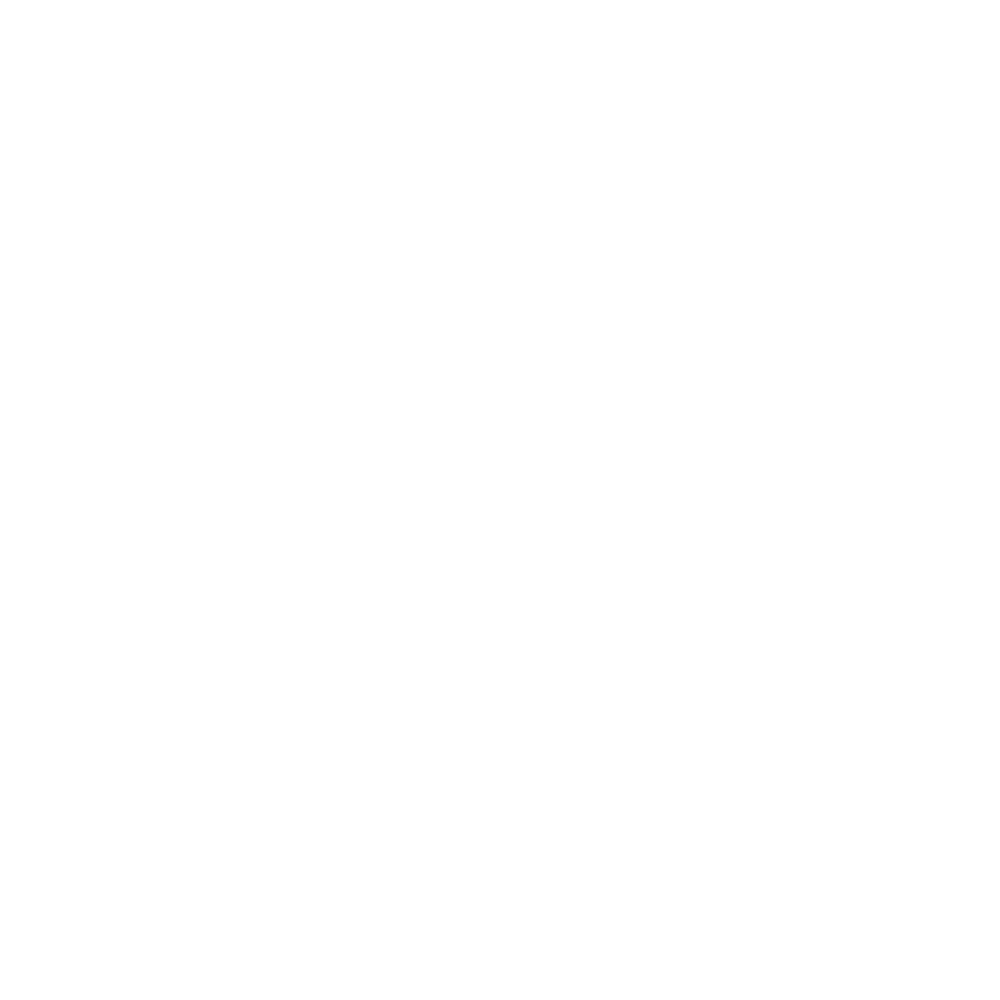

<AxesSubplot:>

In [69]:
new_var_.columns = ['COMUNE','Industrial_structure','Administrative_characteristics','Physical_characteristics','cluster','target']
mymap = mymap.merge(new_var_,how='right')
mymap.plot(column='cluster')
#ax.set_ylim(41.8, 44)
#ax.set_xlim(11, 15)

In [70]:
%matplotlib notebook

import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import axes3d 

<IPython.core.display.Javascript object>


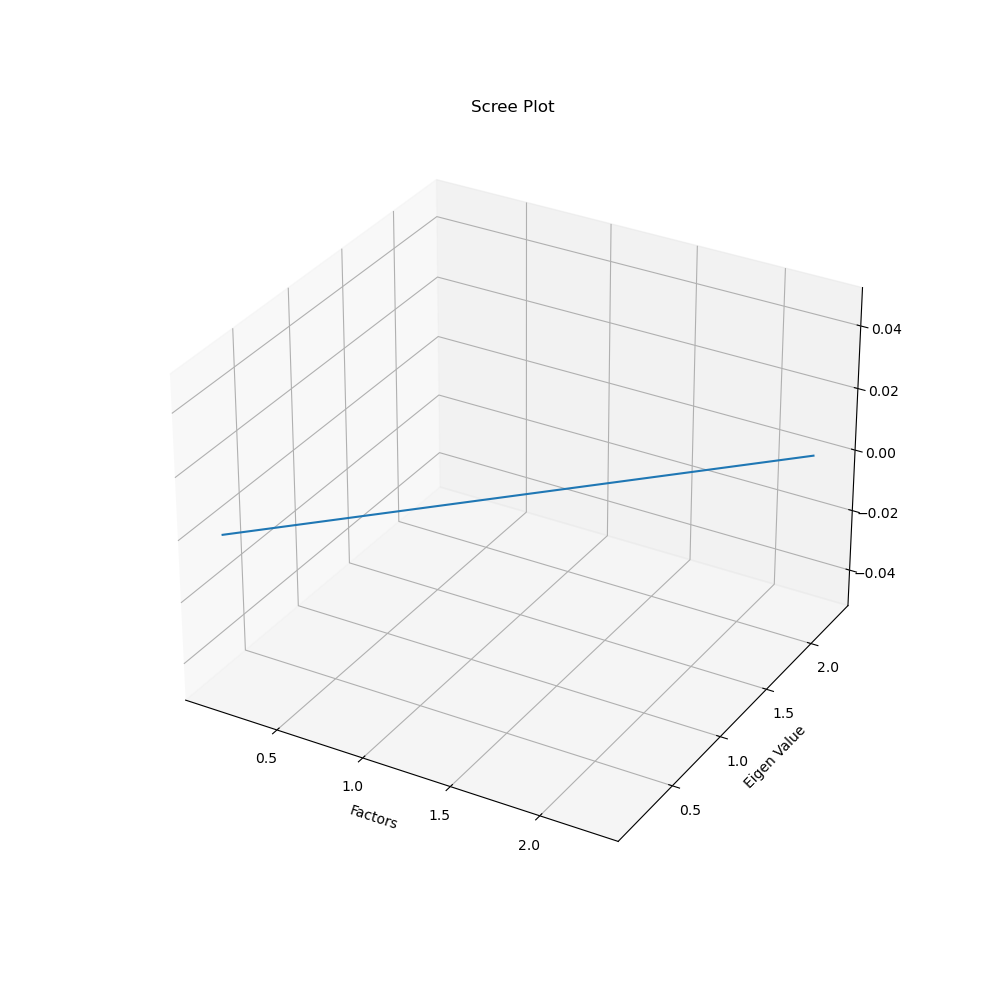

KeyError: 'Physical characteristics'

In [71]:
from mpl_toolkits.mplot3d import Axes3D
from mpl_toolkits.mplot3d import proj3d
import matplotlib.pyplot as plt

import pylab


fig = plt.figure(figsize=(10, 10))
ax = plt.axes(projection='3d')
sctt = ax.scatter3D(new_var_['Industrial_structure'], new_var_['Physical characteristics'], c=new_var_['cluster'], s=new_var_['target'])
ax.set_xlabel('Administrative_characteristics')
ax.set_ylabel('Industrial structure')
ax.set_zlabel('Physical characteristics')
#ax.text(new_var_[new_var_['Comune'] == 'castelsantangelo sul nera']['Reconstruction'].values, new_var_[new_var_['Comune'] == 'castelsantangelo sul nera']['Physical characteristics'].values, new_var_[new_var_['Comune'] == 'castelsantangelo sul nera']['Industrial_structure'].values, '%s' % ('Castelsantangelo sul Nera'), size=20, zorder=1, color='k')
#ax.text(new_var_[new_var_['Comune'] =='accumoli']['Physical characteristics'][0],new_var_[new_var_['Comune'] =='accumoli']['Reconstruction'][0],new_var_[new_var_['Comune'] =='accumoli']['Industrial_structure'][0],  '%s' % (str('Accumoli')), size=12, zorder=10,color='k') 
#ax.text(new_var_[new_var_['Comune'] =='camerino']['Physical characteristics'][15],new_var_[new_var_['Comune'] =='camerino']['Reconstruction'][15],new_var_[new_var_['Comune'] =='camerino']['Industrial_structure'][15],  '%s' % (str('Camerino')), size=12, zorder=10, color='k') 
#ax.text(new_var_[new_var_['Comune'] =='amatrice']['Physical characteristics'][3],new_var_[new_var_['Comune'] =='amatrice']['Reconstruction'][3],new_var_[new_var_['Comune'] =='amatrice']['Industrial_structure'][3],  '%s' % (str('Amatrice')), size=12, zorder=10, color='k') 
#ax.text(new_var_[new_var_['Comune'] =='norcia']['Physical characteristics'][80],new_var_[new_var_['Comune'] =='norcia']['Reconstruction'][80],new_var_[new_var_['Comune'] =='norcia']['Industrial_structure'][80],  '%s' % (str('Norcia')), size=12, zorder=10, color='k') 
#ax.text(new_var_[new_var_['Comune'] =='sellano']['Physical characteristics'][108],new_var_[new_var_['Comune'] =='sellano']['Reconstruction'][108],new_var_[new_var_['Comune'] =='sellano']['Industrial_structure'][108],  '%s' % (str('Sellano')),  size=12, zorder=10, color='k') 
#fig.colorbar(sctt, ax = ax, shrink = 0.5, aspect = 5)
#ax.text(new_var_[new_var_['Comune'] =='sellano']['Physical characteristics'][108],new_var_[new_var_['Comune'] =='sellano']['Reconstruction'][108],new_var_[new_var_['Comune'] =='sellano']['Industrial_structure'][108], "Sellano", ha="center", va="center", rotation=45, size=8, bbox=dict(boxstyle="rarrow,pad=0.1", fc="w", ec="b", lw=1))
#ax.set_zlim3d(-4,2)
#ax.set_xlim3d(-2,4.5)
#ax.set_zlim3d(-2,2)
plt.show()
plt.savefig('3d.png')